Semivariogram definition:

\begin{align}
\bar{S}^2 = \frac{1}{2m} \sum_{i=1}^{m} [z(x_i) - z(x_i+h)]^2
\end{align}

In [1]:
# import sensingbee as sb
import sys
sys.path.append('/home/adelsondias/Repos/sensingbee/sensingbee')
import source as sb
import utils 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

configuration__ = {
    'DATA_FOLDER':'/home/adelsondias/Repos/newcastle/air-quality/data_1week1/',
    'SHAPE_PATH':'/home/adelsondias/Repos/newcastle/air-quality/shape/Middle_Layer_Super_Output_Areas_December_2011_Full_Extent_Boundaries_in_England_and_Wales/Middle_Layer_Super_Output_Areas_December_2011_Full_Extent_Boundaries_in_England_and_Wales.shp',
    'neighborhoods_path': '/home/adelsondias/Repos/newcastle/air-quality/shape/Lower_Layer_Super_Output_Areas_December_2011_Full_Extent__Boundaries_in_England_and_Wales/Lower_Layer_Super_Output_Areas_December_2011_Full_Extent__Boundaries_in_England_and_Wales.shp',
    'Sensors__frequency':'D',
    'Sensors__variables': ['NO2','Temperature','PM2.5'],
    'Sensors__threshold_callibration': {'Temperature':25, 'NO2':80, 'PM2.5':15},
    'Geography__filter_column':'msoa11nm',
    'Geography__filter_label':'Newcastle upon Tyne',
    'Geography__meshgrid':{'dimensions':[50,50], 'longitude_range':[-1.8, -1.51], 'latitude_range':[54.96, 55.05]},
    'osm_bbox': '(54.96,-1.8,55.05,-1.51)',
    'osm_line_objs': ['primary','trunk','motorway','residential'],
    'osm_point_objs': ['traffic_signals','crossing']
}

sensors = sb.Sensors(configuration__, mode='make', path=configuration__['DATA_FOLDER'], delimit_quantiles=True)
sensors.data.head()

Value
Variable Sensor Name     Timestamp            
NO2      amey_emote_1505 2018-07-31  92.087641
                         2018-08-01  62.828326
                         2018-08-02  54.377213
                         2018-08-03  84.743326
                         2018-08-04  44.011492

In [2]:
s = {}

for var in ['Temperature','NO2','PM2.5']:
    values = sensors.data.loc[var]
    coords = sensors.sensors['geometry']

    M = pd.DataFrame()
    for i in range(len(coords)):
        m = coords.apply(lambda x: x.distance(coords.iloc[i])).reset_index()
        m['z'] = [coords.index[i]]*len(m)
        M = M.append(m)
    M.reset_index(inplace=True, drop=True)

    M2 = pd.DataFrame()
    for i in coords.index:
        for j in coords.index:
            try:
                m2 = values.loc[i] - values.loc[j]
            except:
                continue
            m2['zi'] = [i]*len(m2)
            m2['zj'] = [j]*len(m2)
            m2['distance'] = [M[(M['z']==i) & (M['Sensor Name']==j)]['geometry'].values[0]]*len(m2)
            M2 = M2.append(m2)
    M2['Value'] = M2['Value']**2
    M2.reset_index(inplace=True,drop=True)

    s[var] = M2

/home/adelsondias/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/adelsondias/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/adelsondias/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/adelsondias/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/adelsondias/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont:

/home/adelsondias/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/adelsondias/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/adelsondias/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/adelsondias/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/adelsondias/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont:

/home/adelsondias/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/adelsondias/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/adelsondias/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/adelsondias/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/adelsondias/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont:

/home/adelsondias/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/adelsondias/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/adelsondias/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/adelsondias/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/adelsondias/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont:

/home/adelsondias/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/adelsondias/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/adelsondias/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/adelsondias/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/adelsondias/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont:

/home/adelsondias/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/adelsondias/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/adelsondias/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/adelsondias/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/adelsondias/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont:

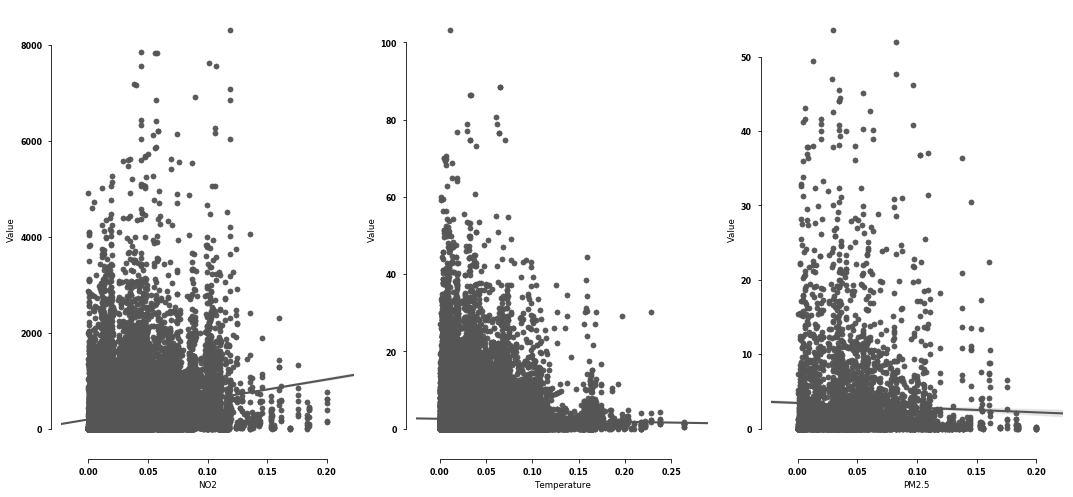

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=[15,7])
# ax.scatter(x=M2['distance'],y=M2['Value'])
plt.rcParams.update({'font.size': 22})

sns.regplot(x='distance',y='Value',data=s['NO2'], ax=ax[0], color='#555555')
ax[0].set_xlabel('NO2')
sns.regplot(x='distance',y='Value',data=s['Temperature'], ax=ax[1], color='#555555')
ax[1].set_xlabel('Temperature')
sns.regplot(x='distance',y='Value',data=s['PM2.5'], ax=ax[2], color='#555555') #logx=True
ax[2].set_xlabel('PM2.5')

sns.despine(offset=10, trim=True);
sns.set_context("paper")
plt.tight_layout()
plt.savefig('plots/semivariogram_variables.png')